## **Jamboree Education**

Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.
They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.

My analysis should help Jamboree in understanding what factors are important in graduate admissions and how these factors are interrelated among themselves. It will also help predict one's chances of admission given the rest of the variables.

### **Problem Statement**
- Identifying the most critical variables affecting graduate admissions.
- Understanding relationships between variables.
- Developing a predictive model to estimate admission chances based on available data.

### **Features of Dataset**

- Serial No. (Unique row ID)
- GRE Scores (out of 340)
- TOEFL Scores (out of 120)
- University Rating (out of 5)
- Statement of Purpose and Letter of Recommendation Strength (out of 5)
- Undergraduate GPA (out of 10)
- Research Experience (either 0 or 1)
- Chance of Admit (ranging from 0 to 1)

In [1]:
##Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading dataset
df=pd.read_csv('Dataset\Jamboree_Admission.csv')
df.head()

<>:2: SyntaxWarning: invalid escape sequence '\J'
<>:2: SyntaxWarning: invalid escape sequence '\J'
C:\Users\mohit\AppData\Local\Temp\ipykernel_40052\2664710388.py:2: SyntaxWarning: invalid escape sequence '\J'
  df=pd.read_csv('Dataset\Jamboree_Admission.csv')


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df.shape

(500, 9)

#### **Descriptive Statistics**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [5]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


- GRE Score:
    - Range: 290 to 340
    - Mean: 316.47, Std: 11.30
- TOEFL Score:
    - Range: 92 to 120
    - Mean: 107.19, Std: 6.08
- University Rating:
    - Range: 1 to 5
    - Mean: 3.11, Std: 1.14
- SOP and LOR:
    - Both range from 1.0 to 5.0 with similar means (~3.4) and standard deviations (~0.99).
- CGPA:
    - Range: 6.8 to 9.92
    - Mean: 8.58, Std: 0.60
- Chance of Admit:
    - Target variable ranges from 0.34 to 0.97.
    - Mean: 0.72, Std: 0.14
- Research:
    - Binary variable (0 or 1), with more students reporting research experience (mean: 0.56).

In [6]:
for i in df.columns:
    print(f"{i}: datatype is {df[i].dtype} and {df[i].nunique()} unique values ")
    print('The unique values are')
    print(df[i].unique())
    print(f"Number of null values: {df[i].isna()}")
    print(f"Data type: {df[i].dtype}")

    print('-'*90)

Serial No.: datatype is int64 and 500 unique values 
The unique values are
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 

- No missing values in the dataset
- Some variables like "University Rating," "SOP," and "LOR" might benefit from being treated as categorical or ordinal.

In [7]:
# Dropping serial number column
df = df.drop(columns=['Serial No.'])

# Shape of the dataset
shape = df.shape

df,shape

(     GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
 0          337          118                  4  4.5   4.5  9.65         1   
 1          324          107                  4  4.0   4.5  8.87         1   
 2          316          104                  3  3.0   3.5  8.00         1   
 3          322          110                  3  3.5   2.5  8.67         1   
 4          314          103                  2  2.0   3.0  8.21         0   
 ..         ...          ...                ...  ...   ...   ...       ...   
 495        332          108                  5  4.5   4.0  9.02         1   
 496        337          117                  5  5.0   5.0  9.87         1   
 497        330          120                  5  4.5   5.0  9.56         1   
 498        312          103                  4  4.0   5.0  8.43         0   
 499        327          113                  4  4.5   4.5  9.04         0   
 
      Chance of Admit   
 0                0.92  
 1          

## **Univariate Analysis**
Converting these two columns to categorical values
- University Rating:

    - It is already an ordinal variable (1 to 5). Treating it as categorical reflects its discrete nature, where higher values represent better rankings.
- Research:

    - It is binary (0 or 1), which makes it naturally categorical.

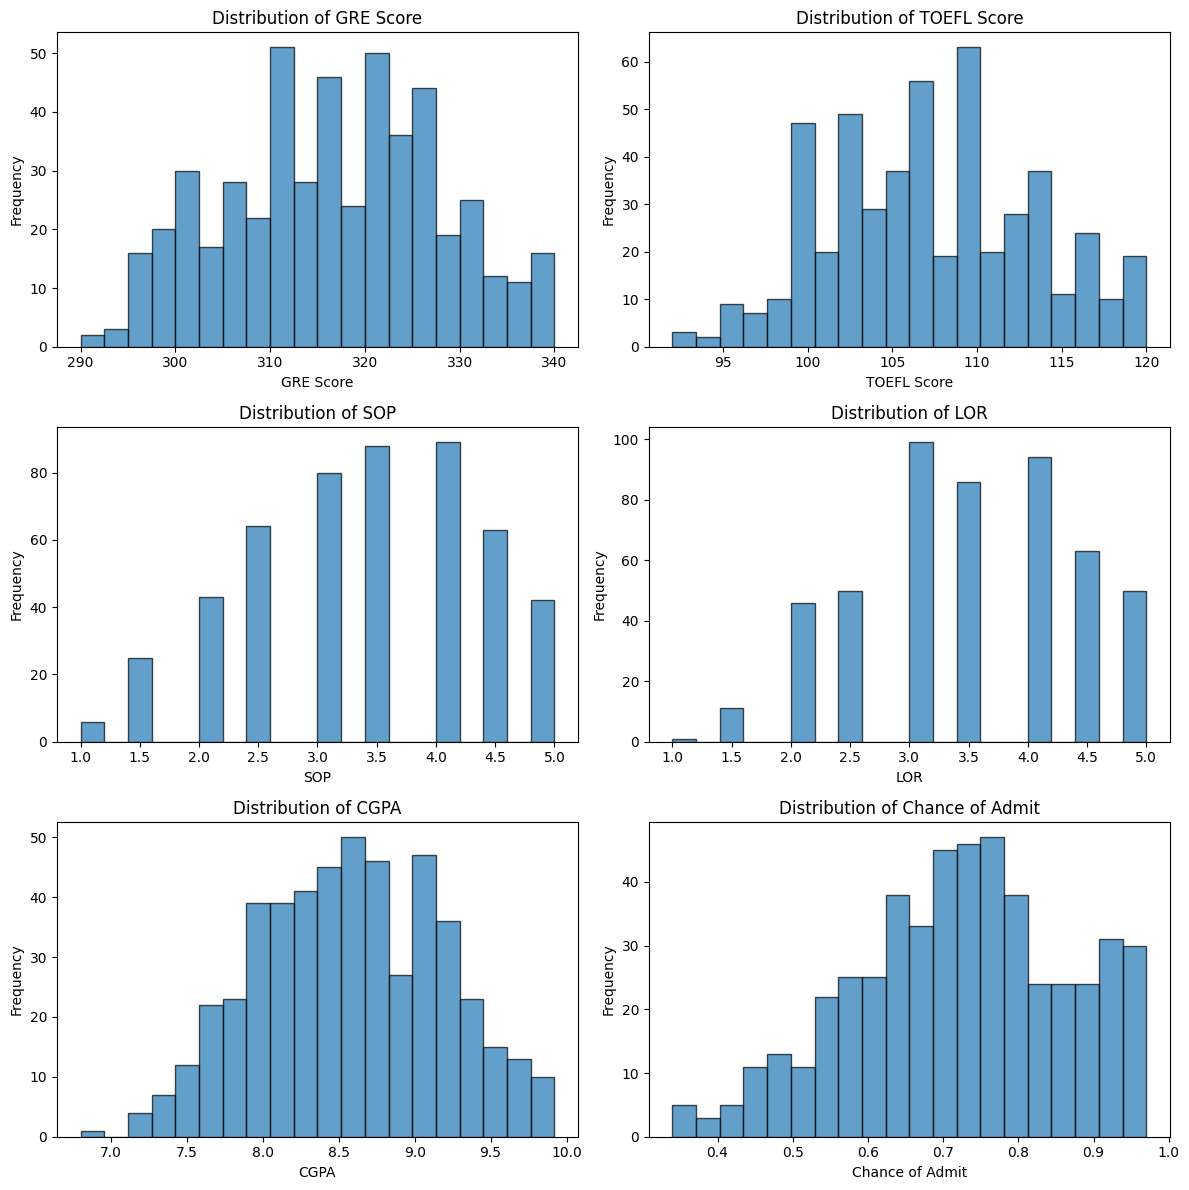

In [8]:
continuous_vars = ['GRE Score', 'TOEFL Score', 'SOP', 'LOR', 'CGPA', 'Chance of Admit']
categorical_vars = ['University Rating', 'Research']

df.columns = df.columns.str.strip()

fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.flatten()

# Continuous Variables
for idx, var in enumerate(continuous_vars):
    axes[idx].hist(df[var], bins=20, edgecolor='k', alpha=0.7)
    axes[idx].set_title(f'Distribution of {var}')
    axes[idx].set_xlabel(var)
    axes[idx].set_ylabel('Frequency')

# Adjust layout for continuous variable plots
plt.tight_layout()
plt.show()



- ### **Univariate Analysis Subplots Insights**
    - **Continuous Variables:**
        - **GRE Score, TOEFL Score, and CGPA:**

            - These variables exhibit near-normal distributions, with a peak around competitive scores and GPAs.
        - **SOP and LOR:**

            - Uniformly distributed, showing diverse applicant strengths.
        - **Chance of Admit:**

            - Slight left skew, indicating many applicants have moderate to high chances of admission.

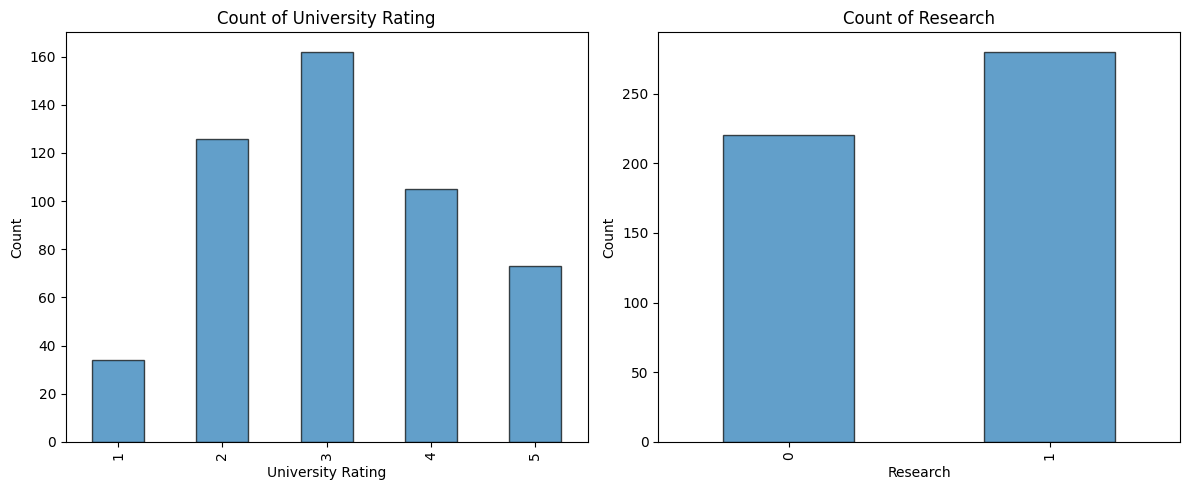

In [9]:
# Categorical Variables in Subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes = axes.flatten()

for idx, var in enumerate(categorical_vars):
    df[var].value_counts().sort_index().plot(kind='bar', ax=axes[idx], edgecolor='k', alpha=0.7)
    axes[idx].set_title(f'Count of {var}')
    axes[idx].set_xlabel(var)
    axes[idx].set_ylabel('Count')

# Adjust layout for categorical variable plots
plt.tight_layout()
plt.show()

- Categorical Variables:
    - University Rating:
    
        - Most applicants aim for universities rated 3, 4, or 5, with fewer targeting lower-rated universities.
    - Research Experience:
     
        - Slightly more applicants report having research experience.

### **Bivariate Analysis**

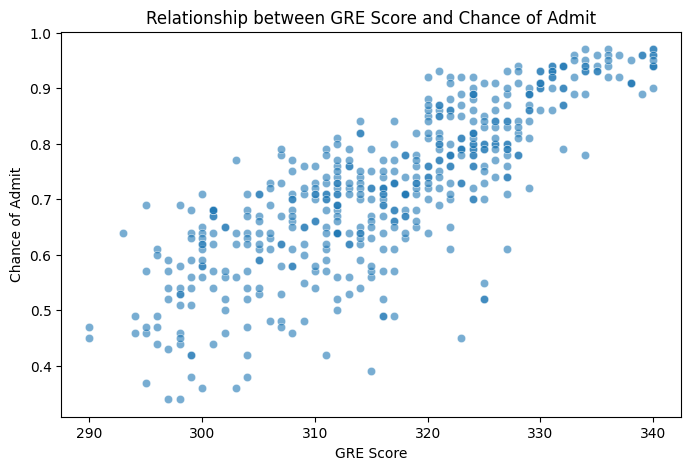

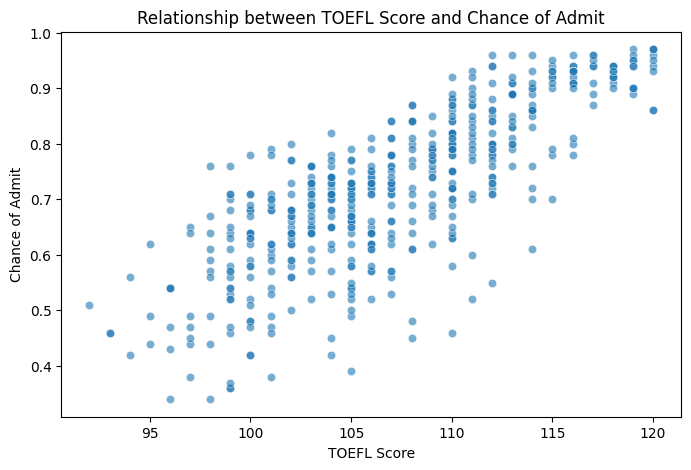

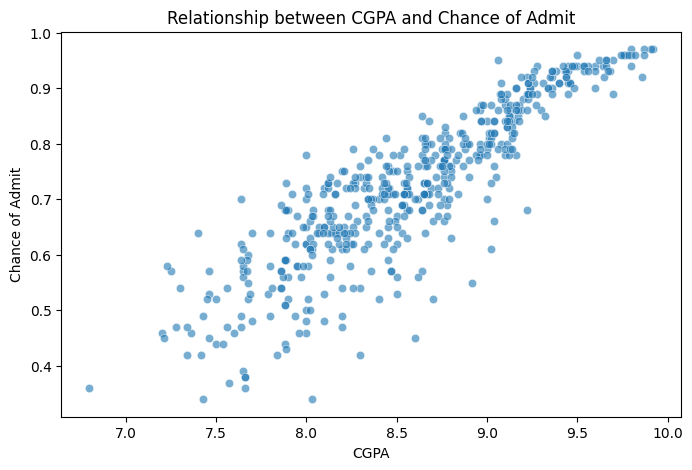

In [10]:
# Bivariate Analysis: Scatter plots for continuous variables against Chance of Admit
continuous_predictors = ['GRE Score', 'TOEFL Score', 'CGPA']
for var in continuous_predictors:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df, x=var, y='Chance of Admit', alpha=0.6)
    plt.title(f'Relationship between {var} and Chance of Admit')
    plt.xlabel(var)
    plt.ylabel('Chance of Admit')
    plt.show()

- Continuous Variables:
    - GRE Score vs. Chance of Admit:

        - Positive correlation observed. Higher GRE scores tend to lead to higher admission chances.
        - Admission probability increases significantly for scores above 320.
    - TOEFL Score vs. Chance of Admit:

        - Similar positive trend. Higher TOEFL scores correspond to increased admission chances.
        - Scores above 110 show a strong likelihood of admission.
    - CGPA vs. Chance of Admit:
 
        - Strong positive correlation. Higher CGPAs are associated with higher admission probabilities.
        - CGPAs above 9 exhibit the highest chances.

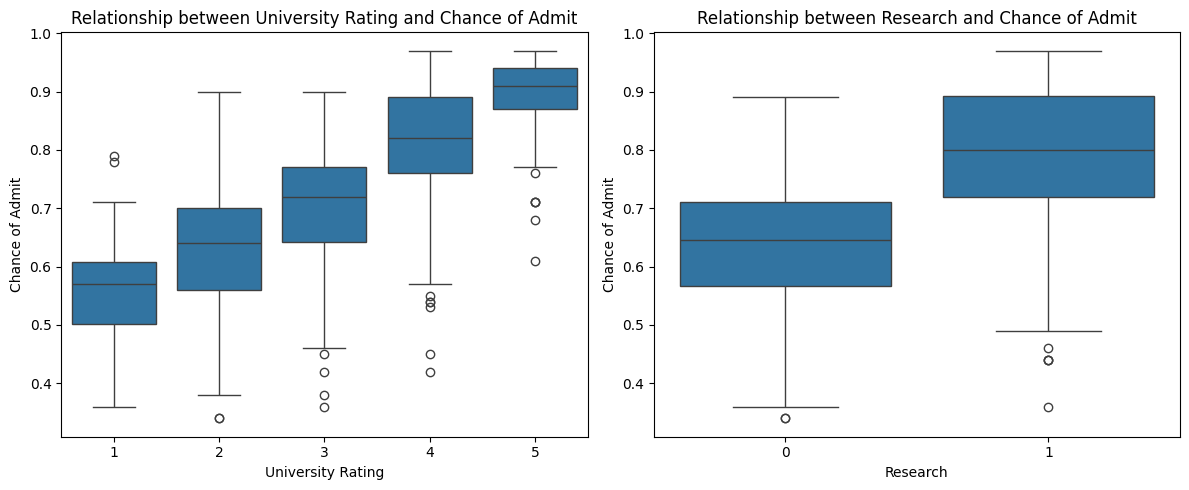

In [11]:
# Bivariate Analysis: Box plots for categorical variables against Chance of Admit

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes = axes.flatten()

# Categorical Variables vs Chance of Admit
for idx, var in enumerate(categorical_vars):
    sns.boxplot(data=df, x=var, y='Chance of Admit', ax=axes[idx])
    axes[idx].set_title(f'Relationship between {var} and Chance of Admit')
    axes[idx].set_xlabel(var)
    axes[idx].set_ylabel('Chance of Admit')

# Adjust layout
plt.tight_layout()
plt.show()

- University Rating:

    - Median admission chances rise with higher university ratings. Top-rated universities (4-5) yield significantly better odds.
- Research Experience:

    - Applicants with research experience have higher chances of admission compared to those without.

---
### **Data Pre-processing**

In [13]:
#Duplicate value check
df.duplicated().sum()

0

In [14]:
#Missing value treatment
df.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [16]:
#Outlier treatment
outliers = {}
for var in ['GRE Score', 'TOEFL Score', 'CGPA', 'SOP', 'LOR']:
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[var] = ((df[var] < lower_bound) | (df[var] > upper_bound))
outliers

{'GRE Score': 0      False
 1      False
 2      False
 3      False
 4      False
        ...  
 495    False
 496    False
 497    False
 498    False
 499    False
 Name: GRE Score, Length: 500, dtype: bool,
 'TOEFL Score': 0      False
 1      False
 2      False
 3      False
 4      False
        ...  
 495    False
 496    False
 497    False
 498    False
 499    False
 Name: TOEFL Score, Length: 500, dtype: bool,
 'CGPA': 0      False
 1      False
 2      False
 3      False
 4      False
        ...  
 495    False
 496    False
 497    False
 498    False
 499    False
 Name: CGPA, Length: 500, dtype: bool,
 'SOP': 0      False
 1      False
 2      False
 3      False
 4      False
        ...  
 495    False
 496    False
 497    False
 498    False
 499    False
 Name: SOP, Length: 500, dtype: bool,
 'LOR': 0      False
 1      False
 2      False
 3      False
 4      False
        ...  
 495    False
 496    False
 497    False
 498    False
 499    False
 Name: LOR, L

In [17]:
#Feature Engineering
# Convert 'University Rating','SOP' and 'LOR' to categorical (Low, Medium, High)
df['SOP_Category'] = pd.cut(df['SOP'], bins=[0, 2, 4, 5], labels=['Low', 'Medium', 'High'])
df['LOR_Category'] = pd.cut(df['LOR'], bins=[0, 2, 4, 5], labels=['Low', 'Medium', 'High'])
df['University_Rating_Category']=pd.cut(df['University Rating'], bins=[0, 2, 4, 5], labels=['Low', 'Medium', 'High'])

In [18]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,SOP_Category,LOR_Category,University_Rating_Category
0,337,118,4,4.5,4.5,9.65,1,0.92,High,High,Medium
1,324,107,4,4.0,4.5,8.87,1,0.76,Medium,High,Medium
2,316,104,3,3.0,3.5,8.00,1,0.72,Medium,Medium,Medium
3,322,110,3,3.5,2.5,8.67,1,0.80,Medium,Medium,Medium
4,314,103,2,2.0,3.0,8.21,0,0.65,Low,Medium,Low


In [23]:
# Encode 'University Rating', 'SOP Category', 'LOR Category', and 'Research' as categorical variables
df['University_Rating_Category'] = df['University Rating'].astype('category')
df['Research'] = df['Research'].astype('category')
df['SOP_Category'] = df['SOP_Category'].astype('category')
df['LOR_Category'] = df['LOR_Category'].astype('category')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   GRE Score                   500 non-null    int64   
 1   TOEFL Score                 500 non-null    int64   
 2   University Rating           500 non-null    int64   
 3   SOP                         500 non-null    float64 
 4   LOR                         500 non-null    float64 
 5   CGPA                        500 non-null    float64 
 6   Research                    500 non-null    category
 7   Chance of Admit             500 non-null    float64 
 8   SOP_Category                500 non-null    category
 9   LOR_Category                500 non-null    category
 10  University_Rating_Category  500 non-null    category
dtypes: category(4), float64(4), int64(3)
memory usage: 30.0 KB


In [24]:
#Data Preparation for Modeling
# Convert categorical variables into dummy/indicator variables for modeling
prepared_data = pd.get_dummies(df, drop_first=True)